# **Project Overview- Perceptron**

**Data Used:** The dataset, heart_failure_clinical_records_dataset.csv, contains demographic and employment-related information. Key features include age, workclass, education, marital status, occupation, relationship, race, gender, capital gain, capital loss, hours per week, native country, and income.

**Process Undertaken:**

**Data Cleaning:** There are no missing values and entire dataset is numeric and hence no data transformations are applied.


**Data Splitting:** The dataset was split into training and testing sets, allocating 80% for training and 20% for testing.

**Model Training and Evaluation:** A Perceptron model was trained on the dataset.The model's performance was evaluated using , R Squareded, RMSE, RSE and the plot used are actual vs predicted prices and residual plot etc

In [1]:
# First, let's read the uploaded CSV file to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/content/heart_failure_clinical_records_dataset2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

def clean_data(df):
    """
    Cleans the dataset by performing various operations:
    - Replaces missing values denoted by '?' with the mode in specified columns.
    - Transforms the 'income' column into binary format (0/1).
    - Drops duplicate rows.
    - Maps education and marital status categories to broader categories.
    - Applies label encoding to all columns.
    """
    # Replace missing values with mode
    for column in ['workclass', 'occupation', 'native-country']:
        mode = df[column].mode()[0]
        df[column] = df[column].replace('?', mode)

    # Transform 'income' column into binary format
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

    # Drop duplicates
    df = df.drop_duplicates()

    # Map education categories to broader categories
    education_mapping = {
        'Preschool': 'Pre-High School',
        '1st-4th': 'Pre-High School',
        '5th-6th': 'Pre-High School',
        '7th-8th': 'Pre-High School',
        '9th': 'High School',
        '10th': 'High School',
        '11th': 'High School',
        '12th': 'High School',
        'HS-grad': 'High School Graduate',
        'Some-college': 'Higher Education',
        'Assoc-acdm': 'Higher Education',
        'Assoc-voc': 'Higher Education',
        'Bachelors': 'Higher Education',
        'Masters': 'Postgraduate Education',
        'Prof-school': 'Postgraduate Education',
        'Doctorate': 'Postgraduate Education'
    }
    df['education'] = df['education'].map(education_mapping)

    # Map marital status categories to broader categories
    marital_status_mapping = {
        'Married-civ-spouse': 'Married',
        'Married-spouse-absent': 'Married',
        'Married-AF-spouse': 'Married',
        'Divorced': 'Not Married',
        'Never-married': 'Not Married',
        'Separated': 'Not Married',
        'Widowed': 'Not Married'
    }
    df['marital-status'] = df['marital-status'].map(marital_status_mapping)

    # Apply label encoding to all categorical columns
    label_encoder = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = label_encoder.fit_transform(df[column])

    return df

def split_data(df, test_size=0.2):
    """
    Splits the dataset into training and test sets.
    """
    X = df.drop('DEATH_EVENT', axis=1)  # Features
    y = df['DEATH_EVENT']  # Target variable

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# Clean the dataset
#cleaned_data = clean_data(data.copy())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = split_data(data.copy())

# Display the first few rows of the cleaned dataset
#cleaned_data.head()


In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 1. Train the Model
# Initialize the Logistic Regression model
log_reg = Perceptron(max_iter=1000)
# Fit the model to the training data
log_reg.fit(X_train, y_train)

# 2. Evaluate the Model
# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


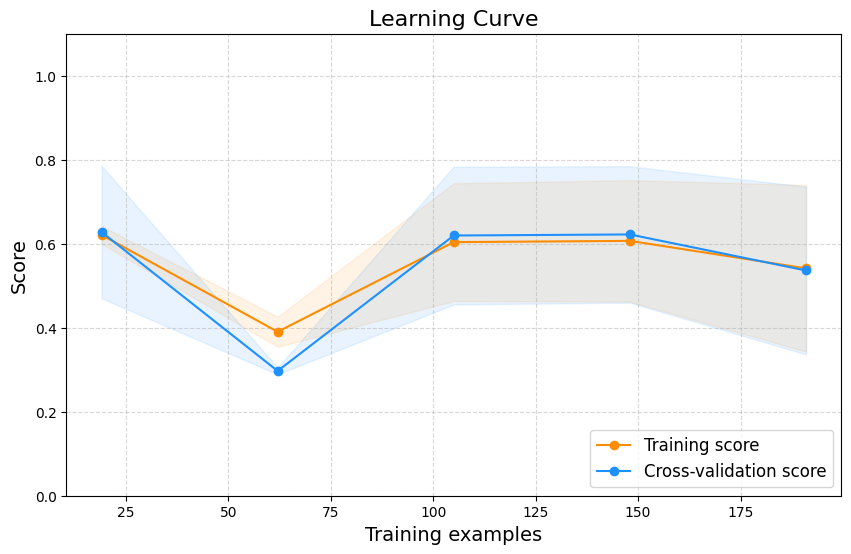

'              precision    recall  f1-score   support\n\n           0       0.58      1.00      0.74        35\n           1       0.00      0.00      0.00        25\n\n    accuracy                           0.58        60\n   macro avg       0.29      0.50      0.37        60\nweighted avg       0.34      0.58      0.43        60\n'

In [7]:

# Function for plotting actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred):
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

# Function for plotting learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve", fontsize=16)
    plt.xlabel("Training examples", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.ylim(0.0, 1.1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff8c00")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#1e90ff")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff8c00", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#1e90ff", label="Cross-validation score")
    plt.legend(loc="lower right", fontsize=12)
    plt.show()



# Plot Actual vs Predicted for first 30 samples
#plot_actual_vs_predicted(y_test[:30], y_pred[:30])

# Plot Learning Curve
plot_learning_curve(log_reg, X_train, y_train)

accuracy

class_report


## Model Performance Summary

- **Model Accuracy**:
  - Achieved 58%, indicating not so reliable overall performance.Needs improvement

- **Learning Curve**:
  - Demonstrates increasing model proficiency with more data; suggests potential for improvement with further refinement or advanced modeling.
